linear regression

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

In [4]:
datafile='ex1data1.txt' #텍스트 파일이므로 변환은 안됨

In [17]:
#read in comma seperated
cols=np.loadtxt(datafile,delimiter=',',usecols=(0,1),unpack=True)
#use "x"matrix and "Y" vector
X=np.transpose(np.array(cols[:-1]))
y=np.transpose(np.array(cols[-1:]))
m=y.size
print(X,y,m) #데이터 확인

[[ 6.1101]
 [ 5.5277]
 [ 8.5186]
 [ 7.0032]
 [ 5.8598]
 [ 8.3829]
 [ 7.4764]
 [ 8.5781]
 [ 6.4862]
 [ 5.0546]
 [ 5.7107]
 [14.164 ]
 [ 5.734 ]
 [ 8.4084]
 [ 5.6407]
 [ 5.3794]
 [ 6.3654]
 [ 5.1301]
 [ 6.4296]
 [ 7.0708]
 [ 6.1891]
 [20.27  ]
 [ 5.4901]
 [ 6.3261]
 [ 5.5649]
 [18.945 ]
 [12.828 ]
 [10.957 ]
 [13.176 ]
 [22.203 ]
 [ 5.2524]
 [ 6.5894]
 [ 9.2482]
 [ 5.8918]
 [ 8.2111]
 [ 7.9334]
 [ 8.0959]
 [ 5.6063]
 [12.836 ]
 [ 6.3534]
 [ 5.4069]
 [ 6.8825]
 [11.708 ]
 [ 5.7737]
 [ 7.8247]
 [ 7.0931]
 [ 5.0702]
 [ 5.8014]
 [11.7   ]
 [ 5.5416]
 [ 7.5402]
 [ 5.3077]
 [ 7.4239]
 [ 7.6031]
 [ 6.3328]
 [ 6.3589]
 [ 6.2742]
 [ 5.6397]
 [ 9.3102]
 [ 9.4536]
 [ 8.8254]
 [ 5.1793]
 [21.279 ]
 [14.908 ]
 [18.959 ]
 [ 7.2182]
 [ 8.2951]
 [10.236 ]
 [ 5.4994]
 [20.341 ]
 [10.136 ]
 [ 7.3345]
 [ 6.0062]
 [ 7.2259]
 [ 5.0269]
 [ 6.5479]
 [ 7.5386]
 [ 5.0365]
 [10.274 ]
 [ 5.1077]
 [ 5.7292]
 [ 5.1884]
 [ 6.3557]
 [ 9.7687]
 [ 6.5159]
 [ 8.5172]
 [ 9.1802]
 [ 6.002 ]
 [ 5.5204]
 [ 5.0594]
 [ 5.7077]

In [18]:
#x matrix에 1을 삽입하는 경우
X=np.insert(X, 0,1, axis=1)

In [19]:
X #분석할 데이터를 ndarray 형식으로 만든 경우

array([[ 1.    ,  6.1101],
       [ 1.    ,  5.5277],
       [ 1.    ,  8.5186],
       [ 1.    ,  7.0032],
       [ 1.    ,  5.8598],
       [ 1.    ,  8.3829],
       [ 1.    ,  7.4764],
       [ 1.    ,  8.5781],
       [ 1.    ,  6.4862],
       [ 1.    ,  5.0546],
       [ 1.    ,  5.7107],
       [ 1.    , 14.164 ],
       [ 1.    ,  5.734 ],
       [ 1.    ,  8.4084],
       [ 1.    ,  5.6407],
       [ 1.    ,  5.3794],
       [ 1.    ,  6.3654],
       [ 1.    ,  5.1301],
       [ 1.    ,  6.4296],
       [ 1.    ,  7.0708],
       [ 1.    ,  6.1891],
       [ 1.    , 20.27  ],
       [ 1.    ,  5.4901],
       [ 1.    ,  6.3261],
       [ 1.    ,  5.5649],
       [ 1.    , 18.945 ],
       [ 1.    , 12.828 ],
       [ 1.    , 10.957 ],
       [ 1.    , 13.176 ],
       [ 1.    , 22.203 ],
       [ 1.    ,  5.2524],
       [ 1.    ,  6.5894],
       [ 1.    ,  9.2482],
       [ 1.    ,  5.8918],
       [ 1.    ,  8.2111],
       [ 1.    ,  7.9334],
       [ 1.    ,  8.0959],
 

plotting the data

Text(0.5, 0, 'Poplulation of City in 10,000s')

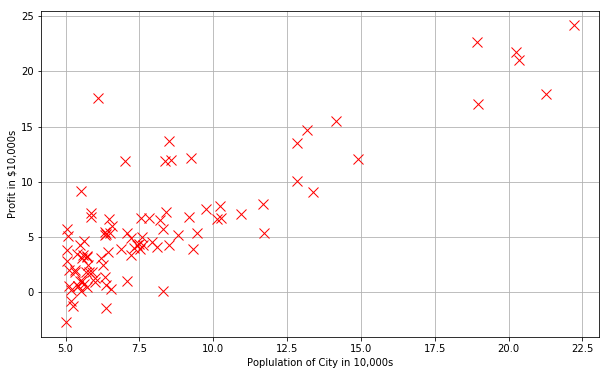

In [23]:
#plot what it seemed what it like
plt.figure(figsize=(10,6))
plt.plot(X[:,1],y[:,0], 'rx',markersize=10)
plt.grid(True)
plt.ylabel('Profit in $10,000s')
plt.xlabel('Poplulation of City in 10,000s')

2. Gradient descent
경사하강법을 사용하는 이유는 결국 cost function을 최소로 할 수 있는, 즉 최적의 parameter을 가지기 위함이다. 

In [24]:
iterations=1500 #총 반복 수
alpha= 0.01 #learning rate

In [33]:
#linear hyposis function
#estimate 즉 linear값에 적용했을 떄의 값
def h(theta, X):
    return np.dot(X, theta)

#cost function (J function)
#m은 m-rows를 의미한다(and 1-cols)
#어차피 행렬 내에서의 제곱이므로 transpose(x)*X형태
def computeCost(mytheta, X,y):
    return float((1./(2*m))*np.dot((h(mytheta, X)-y).T,(h(mytheta, X)-y))) 

In [35]:
#Test
#theta값을 임의로 정해줬을 때, cost functinos의 값
initial_theta=np.zeros((X.shape[1],1))
print(computeCost(initial_theta,X,y))

32.072733877455676


In [110]:
#Actual gradient descnet
def descentGradient(X, theta_start=np.zeros(2)):
    theta=theta_start
    jvec=[] #used to plot cost as function of iteration
    thetahistory=[] #uesd to show the mim path
    for var in range(iterations):
        tmptheta=theta #각 회귀계수값 적용
        jvec.append(computeCost(theta, X,y)) #costfunc
        thetahistory.append(list(theta[:,0])) #theta변화값
        #updating the values
        #각 theat별 실제 gradient descnet를 적용
        for j in range(len(tmptheta)):
            tmptheta[j]=theta[j]-(alpha/m)*np.sum((h(theta,X) - y)*np.array(X[:,j]).reshape(m,1))
        theta=tmptheta
    return theta, thetahistory, jvec

In [83]:
#Actual run gradient descent to get best-fit theta values
initial_theta=np.zeros((X.shape[1],1))
theta, thetahistory, jvec=descentGradient(X,initial_theta)

In [87]:
#Actually run gradient descent to get the best-fit theta values
initial_theta = np.zeros((X.shape[1],1))
theta, thetahistory, jvec = descentGradient(X,initial_theta)

#Plot the convergence of the cost function
def plotConvergence(jvec):
    plt.figure(figsize=(10,6))
    plt.plot(range(len(jvec)),jvec,'bo')
    plt.grid(True)
    plt.title("Convergence of Cost Function")
    plt.xlabel("Iteration number")
    plt.ylabel("Cost function")
    dummy = plt.xlim([-0.05*iterations,1.05*iterations])
    #dummy = plt.ylim([4,8])

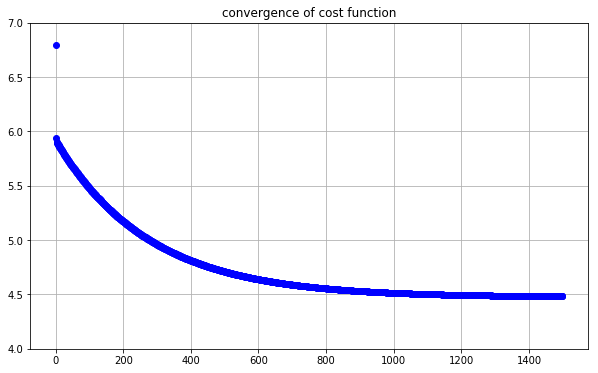

In [62]:
#반복에 따라서 costfunctino이 min값으로 수렴됨을 보인다
plotConvergence(jvec) 
dummy = plt.ylim([4,7])

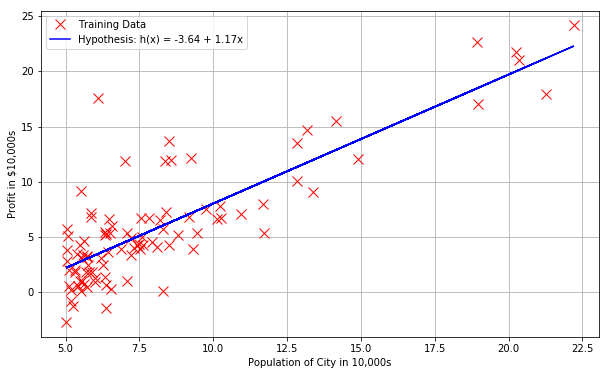

In [63]:
#plot the line on top of data to ensue if looks correct
#x값을 입력했을때, estimate된 결괏값을 plot하기 위함
#회귀모형의 형태에 따라 theta의 갯수, 형태는 다르다
def myfit(xval):
    return theta[0]+theta[1]*xval
plt.figure(figsize=(10,6))
plt.plot(X[:,1],y[:,0],'rx',markersize=10,label='Training Data')
plt.plot(X[:,1],myfit(X[:,1]),'b-',label = 'Hypothesis: h(x) = %0.2f + %0.2fx'%(theta[0],theta[1]))
plt.grid(True) #Always plot.grid true!
plt.ylabel('Profit in $10,000s')
plt.xlabel('Population of City in 10,000s')
plt.legend()

2.4. visualizing the j(theta)

In [64]:
#import necessary matplotlib tools for 3d plots
from mpl_toolkits.mplot3d import axes3d, Axes3D
from matplotlib import cm
import itertools

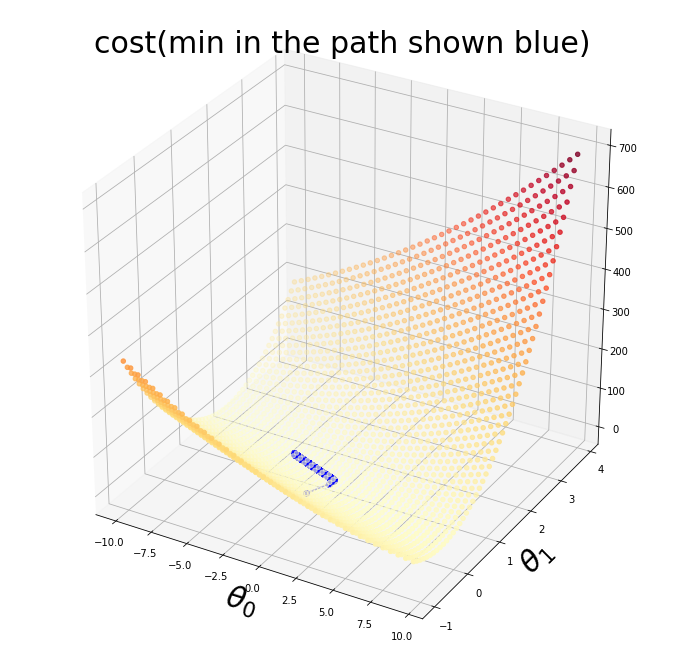

In [85]:
fig=plt.figure(figsize=(12,12))
ax=fig.gca(projection='3d') #3차원그림 명시, 객체
xvals=np.arange(-10,10,.5) #x좌표
yvals=np.arange(-1,4,.1)
#앞에서 생성한 값을 변수에 붙이고 각해당하는 costfunction
myxs, myys, myzs=[],[],[]
for david in xvals:
    for kate in yvals:
        myxs.append(david)
        myys.append(kate)
        myzs.append(computeCost(np.array([[david], [kate]]),X,y))
#각 x,y,z에 대해 분포도를 그리는 방법
scat=ax.scatter(myxs, myys, myzs, c=np.abs(myzs), cmap=plt.get_cmap("YlOrRd"))

plt.xlabel(r'$\theta_0$', fontsize=30)
plt.ylabel(r'$\theta_1$', fontsize=30)
plt.title('cost(min in the path shown blue)',fontsize=30)
plt.plot([x[0] for x in thetahistory], [x[1] for x in thetahistory], jvec,'bo-')
plt.show()

3. linear regression with multiple var.

In [94]:
#데이터파일이 txt로 주어진 경우, ndarray형태로 바꿔 나타냄
datafile='ex1data2.txt'
cols=np.loadtxt(datafile, delimiter=',', usecols=(0,1,2), unpack=True)
#form X matrix and y vector
X=np.transpose(np.array(cols[:-1]))
y=np.transpose(np.array(cols[-1:]))
m=y.size

In [95]:
#inset the usual col of 1's into the "x"mat
X=np.insert(X,0,1,axis=1)

In [96]:
X

array([[1.000e+00, 2.104e+03, 3.000e+00],
       [1.000e+00, 1.600e+03, 3.000e+00],
       [1.000e+00, 2.400e+03, 3.000e+00],
       [1.000e+00, 1.416e+03, 2.000e+00],
       [1.000e+00, 3.000e+03, 4.000e+00],
       [1.000e+00, 1.985e+03, 4.000e+00],
       [1.000e+00, 1.534e+03, 3.000e+00],
       [1.000e+00, 1.427e+03, 3.000e+00],
       [1.000e+00, 1.380e+03, 3.000e+00],
       [1.000e+00, 1.494e+03, 3.000e+00],
       [1.000e+00, 1.940e+03, 4.000e+00],
       [1.000e+00, 2.000e+03, 3.000e+00],
       [1.000e+00, 1.890e+03, 3.000e+00],
       [1.000e+00, 4.478e+03, 5.000e+00],
       [1.000e+00, 1.268e+03, 3.000e+00],
       [1.000e+00, 2.300e+03, 4.000e+00],
       [1.000e+00, 1.320e+03, 2.000e+00],
       [1.000e+00, 1.236e+03, 3.000e+00],
       [1.000e+00, 2.609e+03, 4.000e+00],
       [1.000e+00, 3.031e+03, 4.000e+00],
       [1.000e+00, 1.767e+03, 3.000e+00],
       [1.000e+00, 1.888e+03, 2.000e+00],
       [1.000e+00, 1.604e+03, 3.000e+00],
       [1.000e+00, 1.962e+03, 4.00

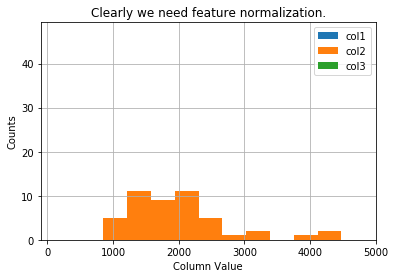

In [97]:
#Quick visualize the data
#ndarry로 되어 있는 경우는 plot로 데이터 확인이 편하다
plt.grid(True)
plt.xlim([-100,5000])
#3개를 겹쳐그리기 때문에 필요한 부분
dummy=plt.hist(X[:,0], label='col1')
dummy=plt.hist(X[:,1], label='col2')
dummy = plt.hist(X[:,2],label = 'col3')
plt.title('Clearly we need feature normalization.')
plt.xlabel('Column Value')
plt.ylabel('Counts')
dummy = plt.legend()

In [101]:
#features noramlizing the columns 
#store the mean and std for later use(원본 데이터 유지)
#note don't modeify original X, y
stored_feature_means, stored_feature_stds=[],[]
Xnorm =X.copy() #새로운 값이되, normal standard시행
for icol in range(Xnorm.shape[1]):
    stored_feature_means.append(np.mean(Xnorm[:,icol]))
    stored_feature_stds.append(np.std(Xnorm[:, icol]))
    #and skip the first column
    if not icol: continue
    #faster to not recompute the mean, std
    Xnorm[:,icol]=(Xnorm[:,icol]-stored_feature_means[-1]/stored_feature_stds[-1])    

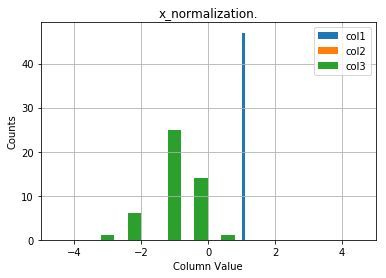

In [107]:
#quick visualization the feature-noramlized-data
plt.grid(True)
plt.xlim([-5,5])
#3개를 겹쳐그리기 떄문에 필요한 부분
dummy=plt.hist(Xnorm[:,0], label='col1')
dummy=plt.hist(Xnorm[:,1], label='col2')
dummy = plt.hist(Xnorm[:,2],label = 'col3')
plt.title('x_normalization.')
plt.xlabel('Column Value')
plt.ylabel('Counts')
dummy = plt.legend()

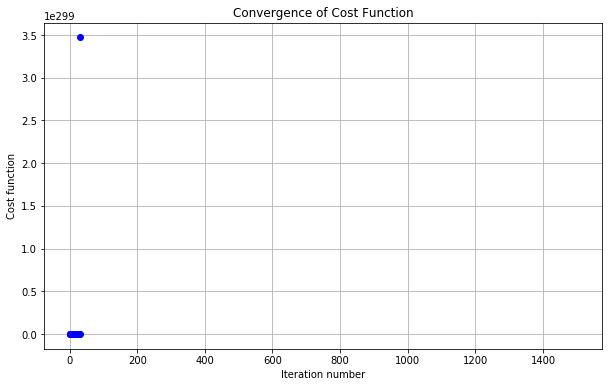

In [112]:
#run gradientDescent with multivarible, 
#but 정규화를 시키지 않으면 overflow에 의해 gradientDescent불가능하다
initial_theta = np.zeros((Xnorm.shape[1],1))
theta, thetahistory, jvec = descentGradient(Xnorm,initial_theta)

#Plot convergence of cost function:
plotConvergence(jvec)